# Directional Edges

**Initialization**

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt
    
import lib.pgm as libpgm
import lib.conv as libconv
import lib.point as libpoint

**Read PGM**

In [5]:
pgm_path = '../assets/pgms/coins.ascii.pgm';
pgm = libpgm.read(pgm_path)

**Helper Functions**

In [6]:
def pgm_to_image(pgm):
    (pixels, dims, *_) = pgm[:]
    return np.array(pixels).reshape(dims).tolist()

def find_horizontal_edges(image):
    kernel = [
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ]
    return libconv.convolve2d(image, kernel);
    
def find_vertical_edges(image):
    kernel = [
        [-1, -1, -1],
        [0, 0, 0],
        [1, 1, 1]
    ]
    return libconv.convolve2d(image, kernel);
    
def show_image(image):
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)

## Find Edges

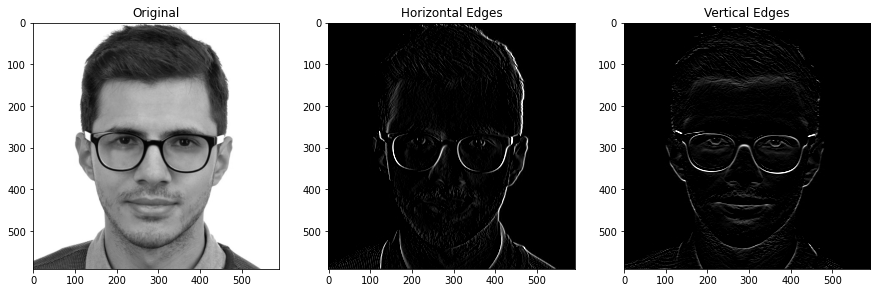

In [7]:
plt.figure(figsize=(15, 15), dpi=72)
plt.subplot(1, 3, 1)
plt.gca().set_title('Original')
libpgm.show(pgm)  

# 1
image = pgm_to_image(pgm)
image = find_horizontal_edges(image)
libconv.pad_zero(image)

plt.subplot(1, 3, 2)
plt.gca().set_title('Horizontal Edges')
show_image(image)

# 2
image = pgm_to_image(pgm)
image = find_vertical_edges(image)
libconv.pad_zero(image)

plt.subplot(1, 3, 3)
plt.gca().set_title('Vertical Edges')
show_image(image)